In [48]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
import ot
import torch

In [64]:
d = []
for i in [2,3,4,5]:
    d += pickle.load(open("./../assets/well/"+str(i)+"_error_prior_results.pkl","rb"))[1]
d = np.array(d).squeeze()

tmp = []
for i in range(d.shape[0]):
    if np.any(d[i,0,0,1:] > 100):
        tmp.append(i)
        print(i)
d = np.delete(d,tmp,0)
d_mean = d.mean(axis=0)


12
22


In [65]:
result = []
num_samples = [10,20,40]
gp_prior = ["No prior","Prior"]
for n in range(d.shape[0]):
    for num_s in range(3):
        for p in range(2):
            for t in range(d.shape[-1]):
                result.append([d[n,num_s,p,t],num_samples[num_s],gp_prior[p],t+1])
df = pd.DataFrame(result,columns=["Error","Number of Samples","Prior","Time"])
df

,Error,Number of Samples,Prior,Time
0,73.881754,10,No prior,1
1,22.199341,10,No prior,2
2,25.584749,10,No prior,3
3,22.290828,10,No prior,4
4,24.029398,10,No prior,5
...,...,...,...,...
2041,21.952288,40,Prior,7
2042,21.555866,40,Prior,8
2043,21.750760,40,Prior,9
2044,22.091780,40,Prior,10


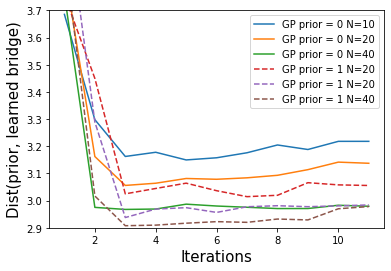

In [67]:
x = np.arange(1,d_mean[0,0,:].shape[0]+1)
plt.plot(x,np.log(d_mean[0,0,:]),label="GP prior = "+str(i)+" N=10",linestyle='-')
plt.plot(x,np.log(d_mean[1,0,:]),label="GP prior = "+str(i)+" N=20")
plt.plot(x,np.log(d_mean[2,0,:]),label="GP prior = "+str(i)+" N=40")
plt.plot(x,np.log(d_mean[0,1,:]),label="GP prior = "+str(1)+" N=20",linestyle='--')
plt.plot(x,np.log(d_mean[1,1,:]),label="GP prior = "+str(1)+" N=20",linestyle='--')
plt.plot(x,np.log(d_mean[2,1,:]),label="GP prior = "+str(1)+" N=40",linestyle='--')


plt.ylim(2.9,3.7)
plt.xlabel("Iterations",fontsize=15)
plt.ylabel("Dist(prior, learned bridge)",fontsize=15)
plt.legend()
plt.savefig('well_compare_param.pdf')  
